In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
!pip install seaborn

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# EDA (Exploratory Data Analysis)

In [3]:
print("The shape of the train dataset is: ", df_train.shape)

The shape of the train dataset is:  (8693, 14)


In [5]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
# TODO: Define what we will be doing with the missing values, for categorical an numerical data

df_train.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [7]:
df_test.isnull().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [8]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_train.select_dtypes(include=['object','bool']).columns

print('Numerical Columns', numerical_columns)
print('Categorical Columns', categorical_columns)

# In previous examples we were treating the boolean values as categorical
# Kaggle suggest that boolean values should be transformed to numercial (1 or 0)

Numerical Columns Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')
Categorical Columns Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name', 'Transported'],
      dtype='object')


In [9]:

df_train['Transported'].value_counts(normalize = True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

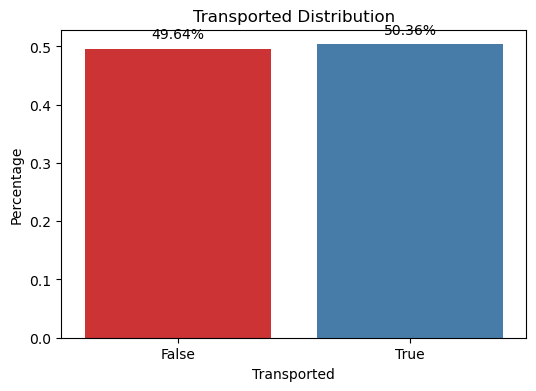

In [18]:
df_counts = df_train['Transported'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(6, 4))
ax = sns.barplot(x='index', y='percentage', data=df_counts, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Transported Distribution')
plt.xlabel('Transported')
plt.ylabel('Percentage')
plt.show()

In [19]:
df_train['VIP'].value_counts(normalize=True)

False    0.976561
True     0.023439
Name: VIP, dtype: float64

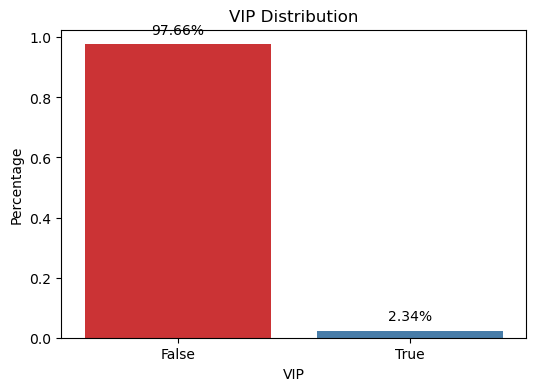

In [20]:
df_counts = df_train['VIP'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(6, 4))
ax = sns.barplot(x='index', y='percentage', data=df_counts, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('VIP Distribution')
plt.xlabel('VIP')
plt.ylabel('Percentage')
plt.show()

In [21]:
df_train['CryoSleep'].value_counts(normalize=True)

False    0.641694
True     0.358306
Name: CryoSleep, dtype: float64

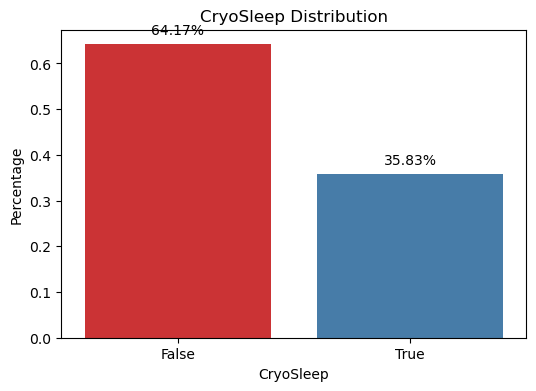

In [22]:
df_counts = df_train['CryoSleep'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(6, 4))
ax = sns.barplot(x='index', y='percentage', data=df_counts, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('CryoSleep Distribution')
plt.xlabel('CryoSleep')
plt.ylabel('Percentage')
plt.show()

In [24]:
df_train['HomePlanet'].value_counts(normalize=True)

Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: HomePlanet, dtype: float64

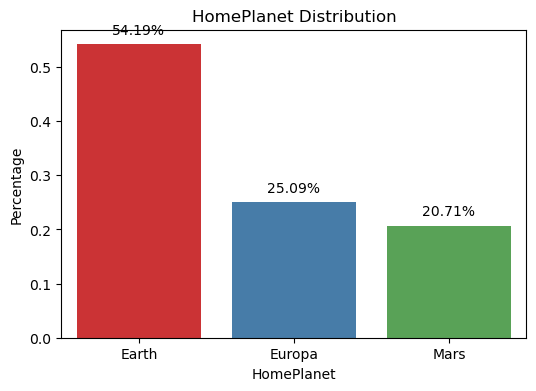

In [25]:
df_counts = df_train['HomePlanet'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(6, 4))
ax = sns.barplot(x='index', y='percentage', data=df_counts, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('HomePlanet Distribution')
plt.xlabel('HomePlanet')
plt.ylabel('Percentage')
plt.show()

In [26]:
df_train['Destination'].value_counts(normalize=True)

TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: Destination, dtype: float64

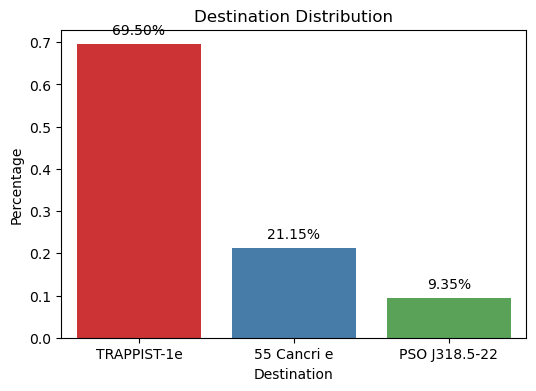

In [27]:
df_counts = df_train['Destination'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(6, 4))
ax = sns.barplot(x='index', y='percentage', data=df_counts, palette='Set1')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Destination Distribution')
plt.xlabel('Destination')
plt.ylabel('Percentage')
plt.show()

In [28]:
df_train[["CabinDeck", "CabinNo.", "CabinSide"]] = df_train["Cabin"].str.split('/', expand = True)

In [32]:
df_counts_deck = df_train["CabinDeck"].value_counts().reset_index(name='Count_Deck')
df_counts_no = df_train["CabinNo."].value_counts().reset_index(name='Count_No')
df_counts_side = df_train["CabinSide"].value_counts().reset_index(name='Count_Side')

print("CabinDeck Counts:\n", df_counts_deck)
print("\nCabinNo. Counts:\n", df_counts_no)
print("\nCabinSide Counts:\n", df_counts_side)

CabinDeck Counts:
   index  Count_Deck
0     F        2794
1     G        2559
2     E         876
3     B         779
4     C         747
5     D         478
6     A         256
7     T           5

CabinNo. Counts:
      index  Count_No
0       82        28
1       86        22
2       19        22
3       56        21
4      176        21
...    ...       ...
1812  1644         1
1813  1515         1
1814  1639         1
1815  1277         1
1816  1894         1

[1817 rows x 2 columns]

CabinSide Counts:
   index  Count_Side
0     S        4288
1     P        4206


In [33]:
df_train['CabinDeck'].value_counts(normalize=True)

F    0.328938
G    0.301271
E    0.103132
B    0.091712
C    0.087944
D    0.056275
A    0.030139
T    0.000589
Name: CabinDeck, dtype: float64

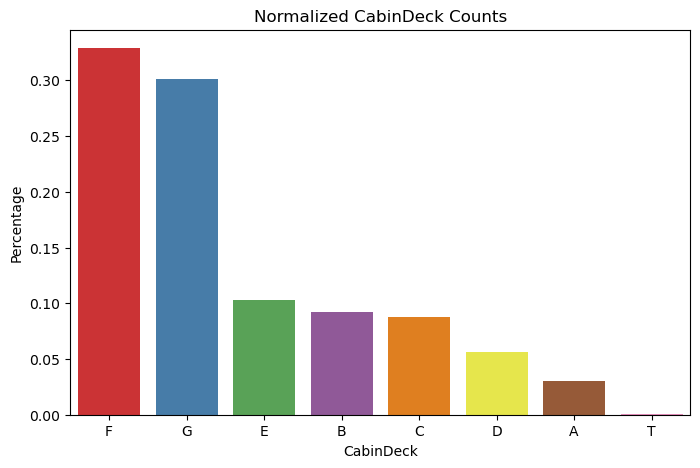

In [34]:
cabin_deck_counts = df_train['CabinDeck'].value_counts(normalize=True).reset_index(name='percentage')


plt.figure(figsize=(8, 5))
sns.barplot(x='index', y='percentage', data=cabin_deck_counts, palette='Set1')
plt.title('Normalized CabinDeck Counts')
plt.xlabel('CabinDeck')
plt.ylabel('Percentage')
plt.show()

In [35]:
df_train['CabinSide'].value_counts(normalize=True)

S    0.504827
P    0.495173
Name: CabinSide, dtype: float64

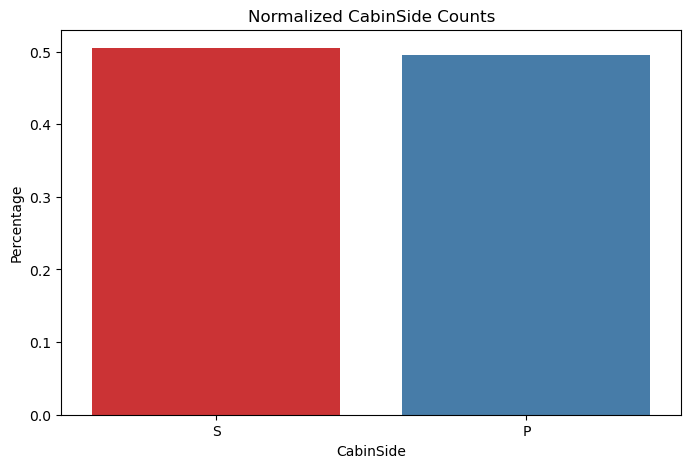

In [37]:
cabin_side_counts = df_train['CabinSide'].value_counts(normalize=True).reset_index(name='percentage')

plt.figure(figsize=(8, 5))
sns.barplot(x='index', y='percentage', data=cabin_side_counts, palette='Set1')
plt.title('Normalized CabinSide Counts')
plt.xlabel('CabinSide')
plt.ylabel('Percentage')
plt.show()

# Bivarable analysis

In [38]:
homeplanet_transported = df_train.groupby('HomePlanet').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

homeplanet_transported['TransportedPercentage'] = homeplanet_transported['Transported'] / homeplanet_transported['PassengerId']


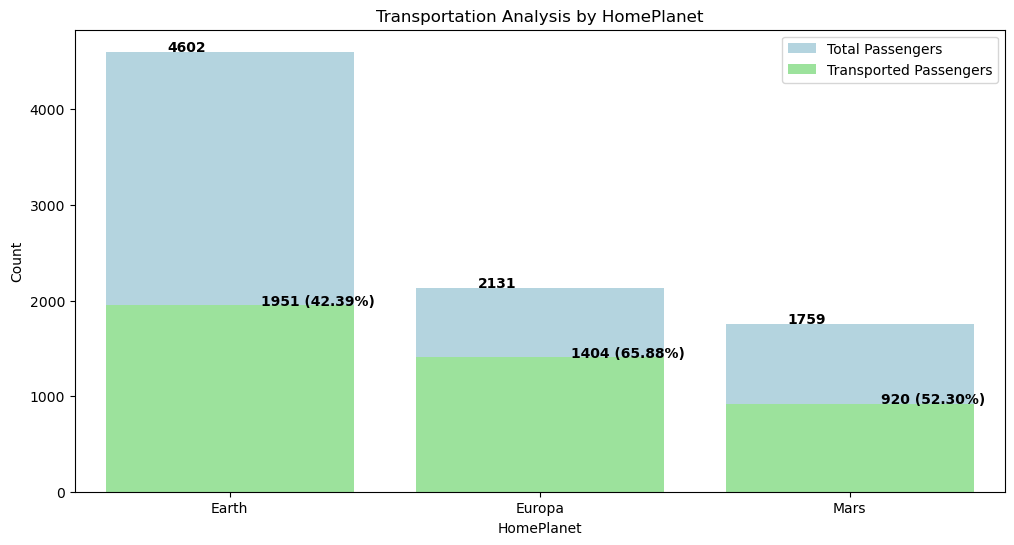

In [43]:
plt.figure(figsize=(12, 6))

homeplanet_transported['TransportedPercentage'] = (homeplanet_transported['Transported'] / homeplanet_transported['PassengerId']) * 100

sns.barplot(x='HomePlanet', y='PassengerId', data=homeplanet_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='HomePlanet', y='Transported', data=homeplanet_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(homeplanet_transported['PassengerId'], homeplanet_transported['Transported'], homeplanet_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend()
plt.show()

In [44]:
cryo_transported = df_train.groupby('CryoSleep').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

cryo_transported['TransportedPercentage'] = cryo_transported['Transported'] / cryo_transported['PassengerId']

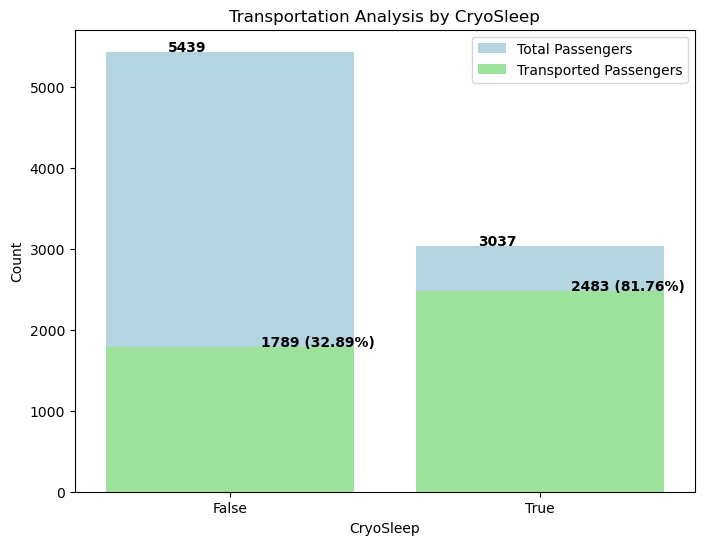

In [46]:
plt.figure(figsize=(8, 6))

cryo_transported['TransportedPercentage'] = (cryo_transported['Transported'] / cryo_transported['PassengerId']) * 100

sns.barplot(x='CryoSleep', y='PassengerId', data=cryo_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='CryoSleep', y='Transported', data=cryo_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(cryo_transported['PassengerId'], cryo_transported['Transported'], cryo_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend()
plt.show()

In [47]:
destination_transported = df_train.groupby('Destination').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

destination_transported['TransportedPercentage'] = destination_transported['Transported'] / destination_transported['PassengerId']

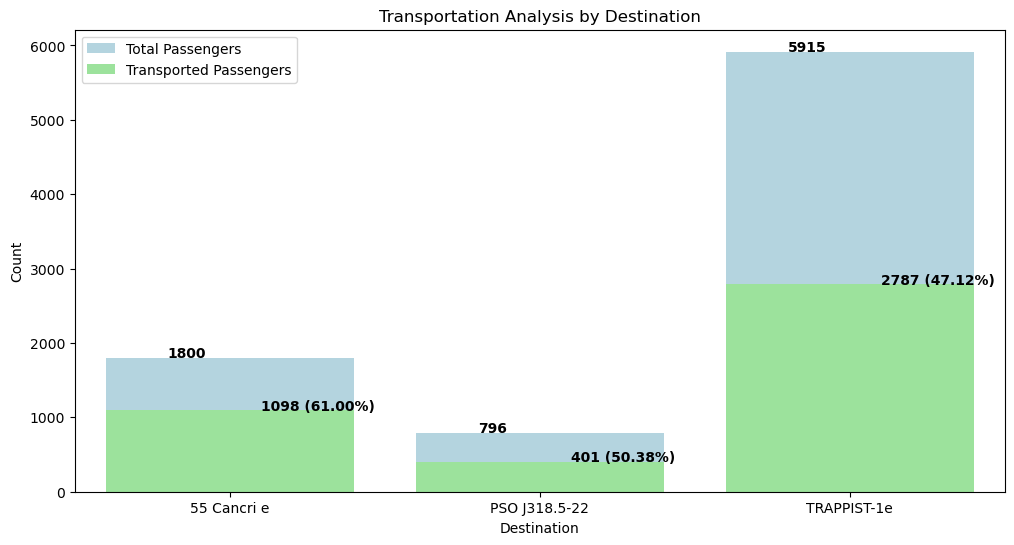

In [49]:
plt.figure(figsize=(12, 6))

destination_transported['TransportedPercentage'] = (destination_transported['Transported'] / destination_transported['PassengerId']) * 100

sns.barplot(x='Destination', y='PassengerId', data=destination_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='Destination', y='Transported', data=destination_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(destination_transported['PassengerId'], destination_transported['Transported'], destination_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend()
plt.show()

In [50]:
vip_transported = df_train.groupby('VIP').aggregate({'Transported': 'sum',
                                                           'PassengerId': 'count'
                                                          }).reset_index()

vip_transported['TransportedPercentage'] = vip_transported['Transported'] / vip_transported['PassengerId']

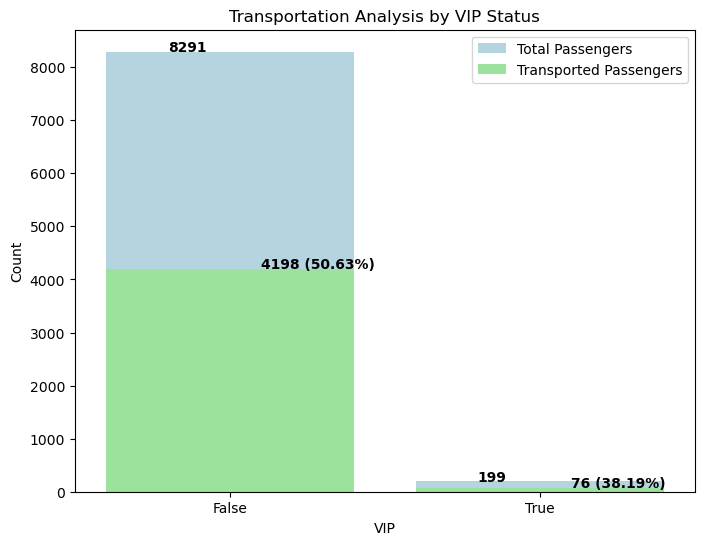

In [52]:
plt.figure(figsize=(8, 6))

vip_transported['TransportedPercentage'] = (vip_transported['Transported'] / vip_transported['PassengerId']) * 100

sns.barplot(x='VIP', y='PassengerId', data=vip_transported, color='lightblue', label='Total Passengers')
sns.barplot(x='VIP', y='Transported', data=vip_transported, color='lightgreen', label='Transported Passengers')

for i, (total, transported, percentage) in enumerate(zip(vip_transported['PassengerId'], vip_transported['Transported'], vip_transported['TransportedPercentage'])):
    plt.text(i - 0.2, total + 2, f'{total}', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.1, transported + 2, f'{transported} ({percentage:.2f}%)', color='black', fontsize=10, fontweight='bold')

plt.title('Transportation Analysis by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.legend()
plt.show()

In [53]:
cryo_transported.sort_values(by='TransportedPercentage', ascending=False)

,CryoSleep,Transported,PassengerId,TransportedPercentage
1,True,2483,3037,81.758314
0,False,1789,5439,32.892076


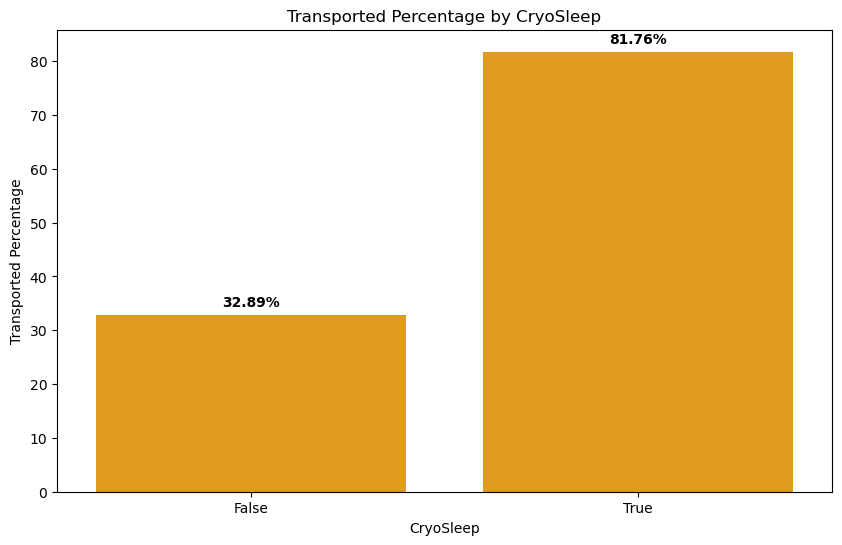

In [64]:
cryo_transported_sorted = cryo_transported.sort_values(by='TransportedPercentage', ascending=True)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='CryoSleep', y='TransportedPercentage', data=cryo_transported_sorted, color='orange')

for i, percentage in enumerate(cryo_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Transported Percentage')
plt.show()


In [65]:
vip_transported.sort_values(by='TransportedPercentage', ascending=False)

,VIP,Transported,PassengerId,TransportedPercentage
0,False,4198,8291,50.633217
1,True,76,199,38.190955


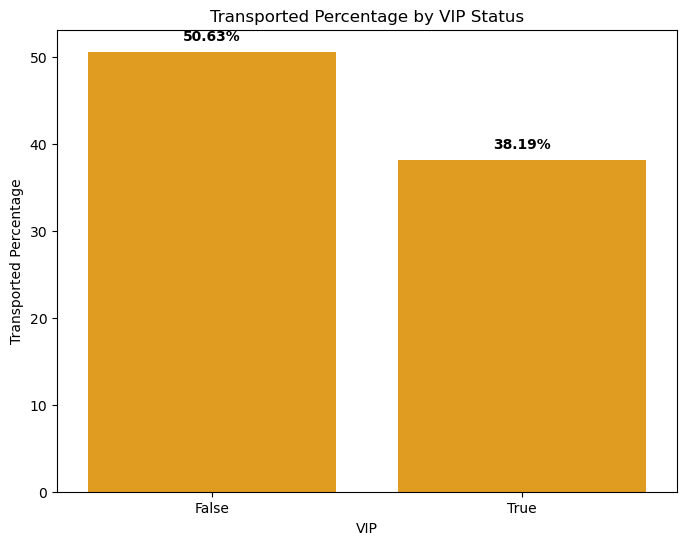

In [76]:
vip_transported_sorted = vip_transported.sort_values(by='TransportedPercentage', ascending=False)

plt.figure(figsize=(8, 6))

bar_plot = sns.barplot(x='VIP', y='TransportedPercentage', data=vip_transported_sorted, color='orange')

for i, percentage in enumerate(vip_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by VIP Status')
plt.xlabel('VIP')
plt.ylabel('Transported Percentage')
plt.show()


In [70]:
homeplanet_transported.sort_values(by='TransportedPercentage', ascending=False)

,HomePlanet,Transported,PassengerId,TransportedPercentage
1,Europa,1404,2131,65.884561
2,Mars,920,1759,52.302445
0,Earth,1951,4602,42.394611


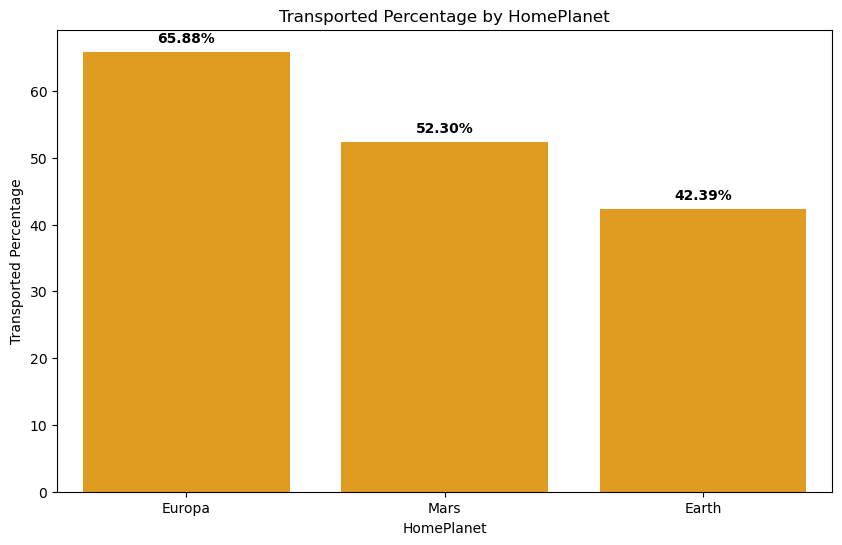

In [74]:
homeplanet_transported_sorted = homeplanet_transported.sort_values(by='TransportedPercentage', ascending=False)

plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(x='HomePlanet', y='TransportedPercentage', data=homeplanet_transported_sorted, color='orange')

for i, percentage in enumerate(homeplanet_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Transported Percentage')
plt.show()


In [77]:
destination_transported.sort_values(by='TransportedPercentage', ascending=False)

,Destination,Transported,PassengerId,TransportedPercentage
0,55 Cancri e,1098,1800,61.000000
1,PSO J318.5-22,401,796,50.376884
2,TRAPPIST-1e,2787,5915,47.117498


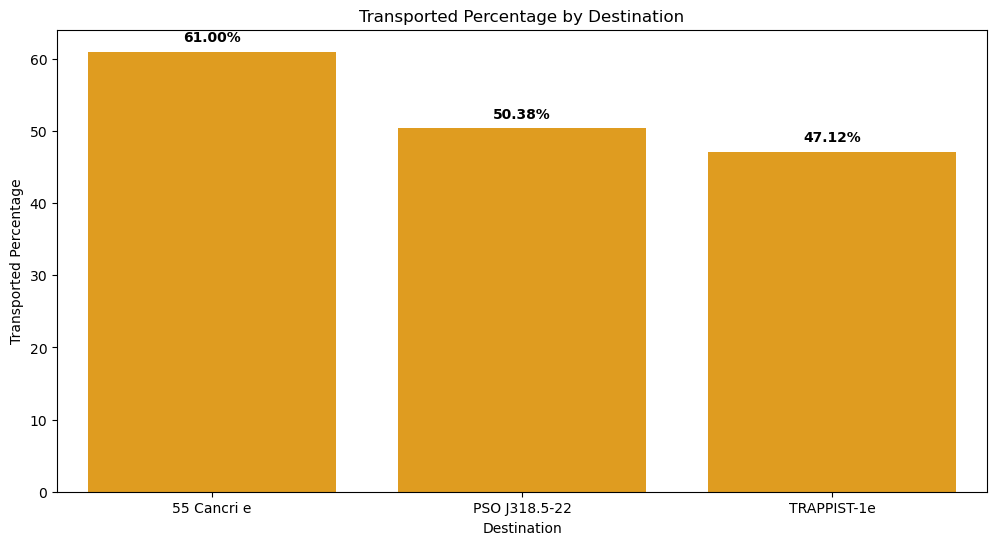

In [79]:
destination_transported_sorted = destination_transported.sort_values(by='TransportedPercentage', ascending=False)

plt.figure(figsize=(12, 6))

bar_plot = sns.barplot(x='Destination', y='TransportedPercentage', data=destination_transported_sorted, color='orange')

for i, percentage in enumerate(destination_transported_sorted['TransportedPercentage']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Transported Percentage by Destination')
plt.xlabel('Destination')
plt.ylabel('Transported Percentage')
plt.show()

# Null values treatment

#### Filling with mode and means

In [127]:
# Merge train and test  to infer null values

df_train2= df_train.drop(["CabinDeck", "CabinNo.", "CabinSide"], axis=1).copy().drop(['Transported'],axis=1)

df_train2.shape


(8693, 13)

In [129]:
data = pd.concat([df_train2, df_test], axis = 0).reset_index(drop = True)

data.shape

(12970, 13)

In [153]:
data.isnull().sum().sort_values(ascending=False)

CryoSleep       310
ShoppingMall    306
Cabin           299
VIP             296
Name            294
FoodCourt       289
HomePlanet      288
Spa             284
Destination     274
Age             270
VRDeck          268
RoomService     263
PassengerId       0
dtype: int64

In [183]:
data2 = data.copy()

missing_categorical_columns = data2.select_dtypes(include=['object','bool']).isna().sum() > 0
missing_categorical_columns = list(missing_categorical_columns[missing_categorical_columns].index)
missing_categorical_columns

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

In [184]:
for col in missing_categorical_columns:
    data2[col] = data2[col].fillna(data2[col].mode()[0])

In [185]:
data2.isnull().sum().sort_values(ascending=False)

ShoppingMall    306
FoodCourt       289
Spa             284
Age             270
VRDeck          268
RoomService     263
PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
VIP               0
Name              0
dtype: int64

## Option 1 filling missing values with 0 for boolean data will add them to the 'False' statement

In [13]:
df_train['CryoSleep'] = df_train['CryoSleep'].fillna(value=0)

In [14]:
df_train.isnull().sum().sort_values(ascending=False)

ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
CryoSleep         0
Transported       0
dtype: int64

In [16]:
# Results in 1% difference between the values
df_train['CryoSleep'].value_counts(normalize=True)

CryoSleep
False    0.650638
True     0.349362
Name: proportion, dtype: float64

In [29]:
df_train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

## Option 2 drop Null values which leaves us with less records for the model

In [21]:
df_train_na = df_train.dropna()

In [23]:
print("The shape of the train dataset is: ", df_train_na.shape)
# There is a loss of nearly 2,000 records....

The shape of the train dataset is:  (6606, 14)


## Option 3 Fill missing values with the mean value or the mode for categorical

## Option 4 use ML to fill in missing values =O

In [ ]:
# Train a classification model to infer the missing values from the data 

### After we decide the later we should export a new train csv and use it in Tableau to do the EDA similar to the medium article

### TODO: Crear nuevas features en base al EDA

### En paralelo se podria trabajar con el desarrollo del modelo aunque no se tengan las nuevas feature variables


## Podemos intentar correr el modelo directamente brincandonos todo y despues regresar e ir haciendo optimizaciones hasta donde nos alcance la vida
